In [1]:

from src.trainer import train_dqn, train_Hdqn
from src.agents import DQN_Agent

import ale_py
import gymnasium as gym
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

from tqdm.auto import tqdm
from IPython.display import clear_output

import time

from src.environments.montezuma import CreateMontezumaRevengeEnv

In [2]:
env = CreateMontezumaRevengeEnv(track_obj=True)

A.L.E: Arcade Learning Environment (version 0.10.1+unknown)
[Powered by Stella]


In [3]:
def draw(obs, info):
    obs[info["char_pos"][0], info["char_pos"][1]] = 255

    for c in ["ladder_pos", "key_pos", "door_pos"]:
        for x, y in info[c]:
            obs[x][y] = 255

In [4]:
obs, info = env.reset()


In [5]:
obs.shape

(4, 84, 84)

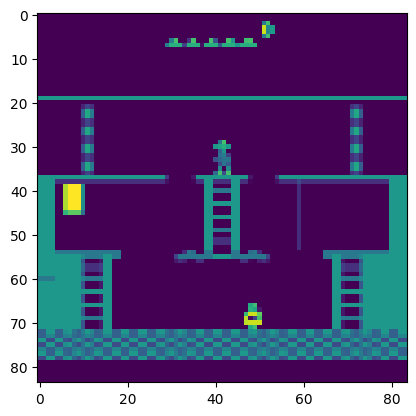

In [6]:
t = env.encode_goal(obs, info, 1)
plt.imshow(t.max(axis=0))


In [7]:
info["intrinsic_rewards"]

[1, 0, 0, 0, 0, 0, 0]

In [8]:

obs, info = env.reset()
while True:
    action = env.action_space.sample()
    obs, reward, done, truncation, info = env.step(action)

    s = obs[-1]
    # # draw(s, info)
    ifshow = False
    for i in range(1, len(info["intrinsic_rewards"])):
        if info["intrinsic_rewards"][i] > 0:
            t = env.encode_goal(obs, info, i)
            # plt.imshow(t.max(axis=0))
            s = t.max(axis=0)
            ifshow = True
            break

    # print(info["intrinsic_rewards"])
    clear_output(wait=True)
    plt.imshow(s)
    plt.axis('off')  # Hide the axis
    plt.show()

    if ifshow:
        time.sleep(0.01)

    if done or truncation:
        state, _ = env.reset()

KeyboardInterrupt: 

In [11]:

obs, info = env.reset()
while True:
    action = env.action_space.sample()
    obs, reward, done, truncation, info = env.step(action)

    # s = obs[-1]
    # draw(s, info)


    # print(info["intrinsic_rewards"])
    # clear_output(wait=True)
    # plt.imshow(s)
    # plt.axis('off')  # Hide the axis
    # plt.show()

    if done or truncation:
        state, _ = env.reset()

KeyboardInterrupt: 